### importing libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

### Data Visualization

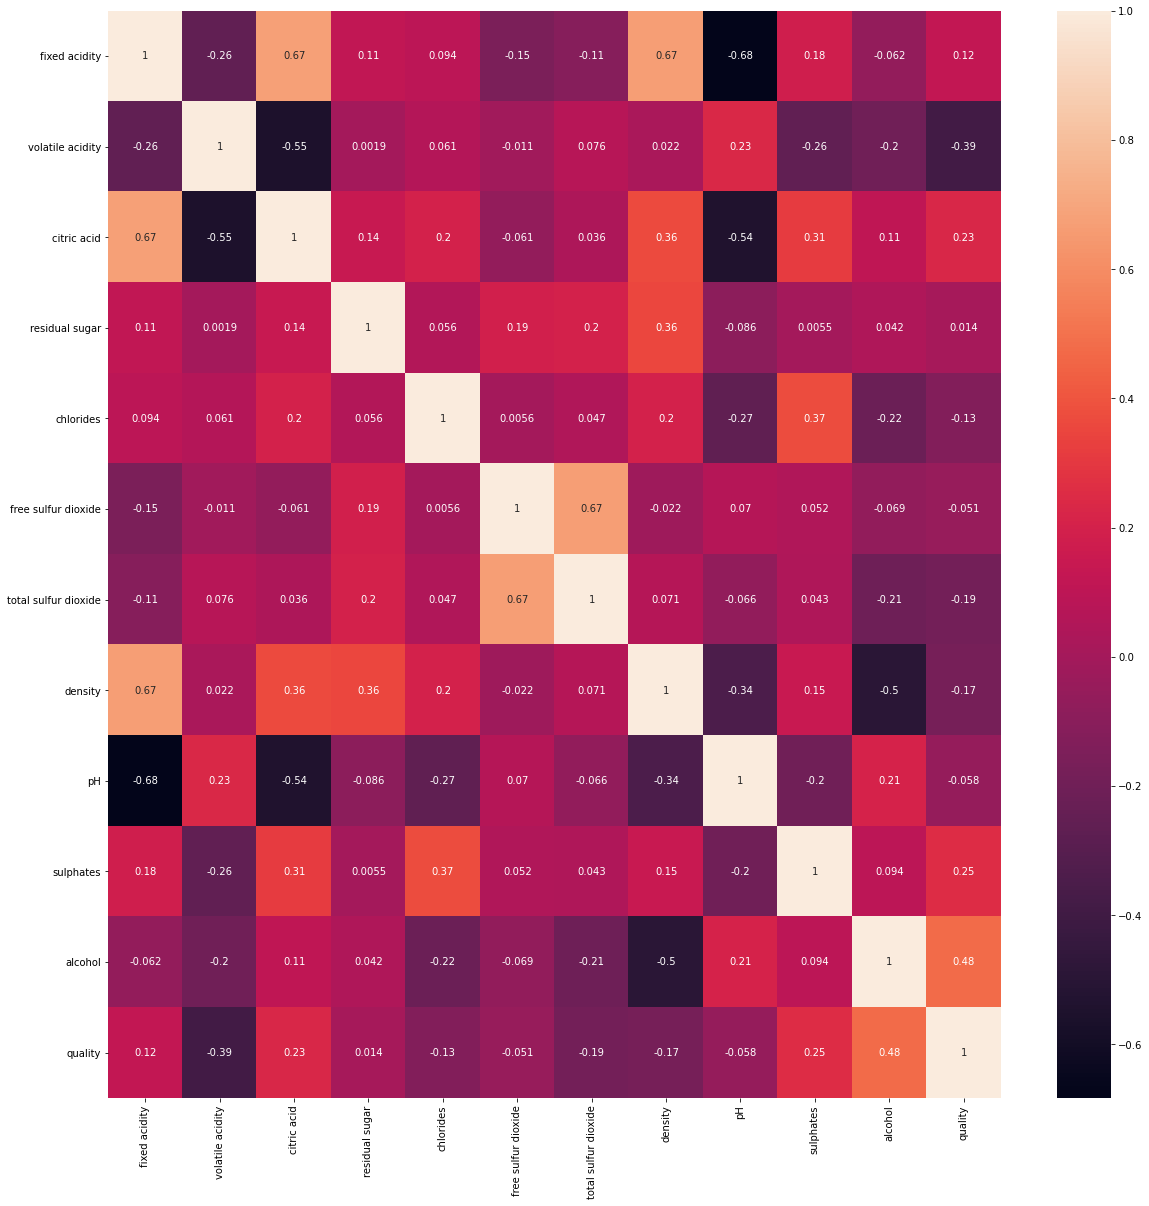

In [6]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

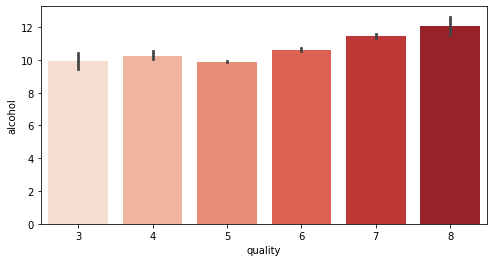

In [7]:
plt.figure(figsize=(8,4))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Reds")

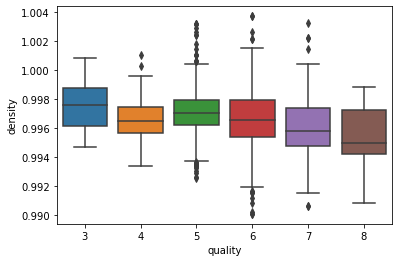

In [8]:
sns.boxplot('quality', 'density', data = df)

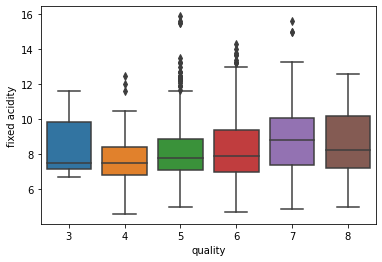

In [9]:
sns.boxplot('quality', 'fixed acidity', data = df)

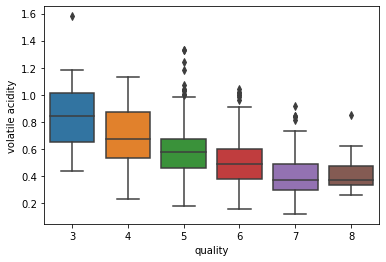

In [10]:
sns.boxplot('quality', 'volatile acidity', data = df)

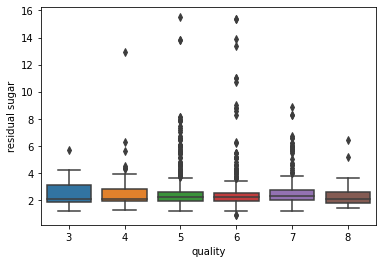

In [11]:
sns.boxplot('quality', 'residual sugar', data = df)

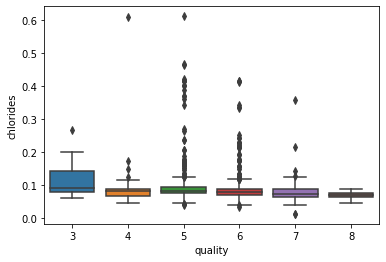

In [12]:
sns.boxplot('quality', 'chlorides', data = df)

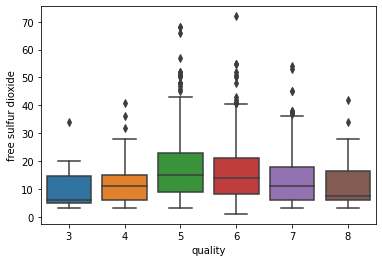

In [13]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

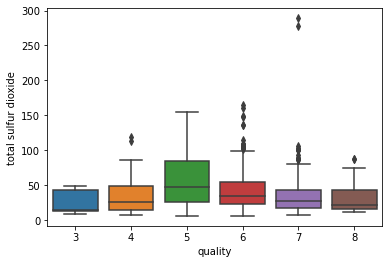

In [14]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

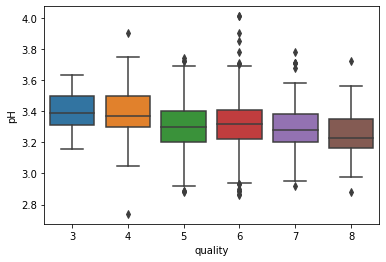

In [15]:
sns.boxplot('quality', 'pH', data = df)

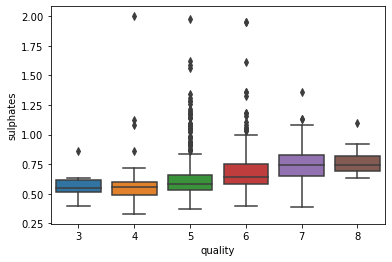

In [16]:
sns.boxplot('quality', 'sulphates', data = df)

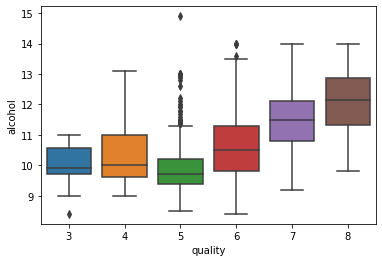

In [17]:
sns.boxplot('quality', 'alcohol', data = df)

In [18]:
#coverting quality into binary thaking 6 threshold
df['quality']=df['quality'].apply(lambda x : 1 if x>6 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Applying Algorithm

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.feature_selection import VarianceThreshold

In [20]:
#selection using variance threshold
X=df.drop('quality',axis=1)
y=df['quality']

In [21]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit(X)
X=X[X.columns[sel.get_support(indices=True)]]
print(X)

      fixed acidity  residual sugar  free sulfur dioxide  \
0               7.4             1.9                 11.0   
1               7.8             2.6                 25.0   
2               7.8             2.3                 15.0   
3              11.2             1.9                 17.0   
4               7.4             1.9                 11.0   
...             ...             ...                  ...   
1594            6.2             2.0                 32.0   
1595            5.9             2.2                 39.0   
1596            6.3             2.3                 29.0   
1597            5.9             2.0                 32.0   
1598            6.0             3.6                 18.0   

      total sulfur dioxide  alcohol  
0                     34.0      9.4  
1                     67.0      9.8  
2                     54.0      9.8  
3                     60.0      9.8  
4                     34.0      9.4  
...                    ...      ...  
1594         

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=False)

[[445  24]
 [ 50   9]]
Accuracy : 0.8598484848484849 
 f1 acore : 0.1956521739130435 
 recall : 0.15254237288135594
[0.         0.05117271 1.        ] [0.         0.15254237 1.        ]


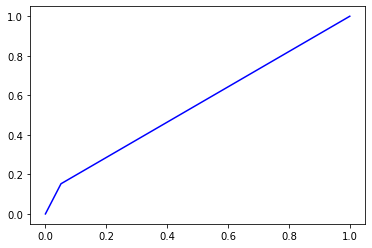

In [23]:
#prediction with Logistic regrression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(confusion_matrix(y_test,pred))
print("Accuracy :",accuracy_score(y_test,pred),"\n f1 acore :",f1_score(y_test,pred),"\n recall :",recall_score(y_test,pred))
fpr, tpr, threshold = roc_curve(y_test, pred)
print(fpr,tpr)
plt.plot(fpr,tpr,'b')

[[422  47]
 [ 41  18]]
Accuracy : 0.8333333333333334 
 f1 acore : 0.29032258064516137 
 recall : 0.3050847457627119
[0.         0.10021322 1.        ] [0.         0.30508475 1.        ]


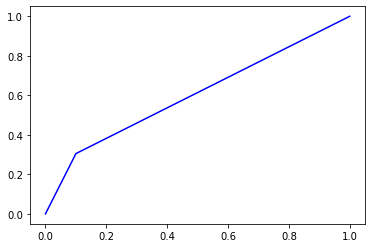

In [24]:
#prediction with KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print("Accuracy :",accuracy_score(y_test,pred),"\n f1 acore :",f1_score(y_test,pred),"\n recall :",recall_score(y_test,pred))
fpr, tpr, threshold = roc_curve(y_test, pred)
print(fpr,tpr)
plt.plot(fpr,tpr,'b')

[[440  29]
 [ 46  13]]
Accuracy : 0.8579545454545454 
 f1 acore : 0.25742574257425743 
 recall : 0.22033898305084745
[0.         0.06183369 1.        ] [0.         0.22033898 1.        ]


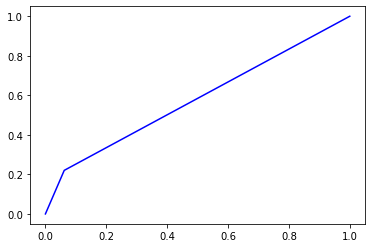

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print("Accuracy :",accuracy_score(y_test,pred),"\n f1 acore :",f1_score(y_test,pred),"\n recall :",recall_score(y_test,pred))
fpr, tpr, threshold = roc_curve(y_test, pred)
print(fpr,tpr)
plt.plot(fpr,tpr,'b')

[[456  13]
 [ 56   3]]
Accuracy : 0.8693181818181818 
 f1 acore : 0.08 
 recall : 0.05084745762711865
[0.         0.02771855 1.        ] [0.         0.05084746 1.        ]


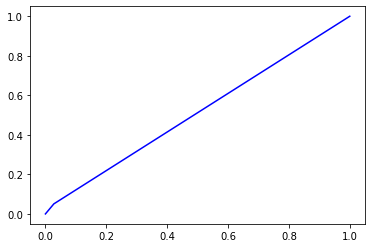

In [26]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print("Accuracy :",accuracy_score(y_test,pred),"\n f1 acore :",f1_score(y_test,pred),"\n recall :",recall_score(y_test,pred))
fpr, tpr, threshold = roc_curve(y_test, pred)
print(fpr,tpr)
plt.plot(fpr,tpr,'b')